## Import modules

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading training and test data

In [5]:
#Load into the dataframe
train = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")
test = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)
features = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','wage']
train.columns=features
test.columns=features

In [6]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [10]:
# Dimensions of training data
train.shape

(32560, 15)

In [11]:
# Dimensions of test data
test.shape

(16281, 15)

In [12]:
train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
test.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [14]:
#Check if any null elements are present
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage              0
dtype: int64

In [15]:
test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage              0
dtype: int64

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null int64
workclass         32560 non-null object
fnlwgt            32560 non-null int64
education         32560 non-null object
education-num     32560 non-null int64
marital-status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital-gain      32560 non-null int64
capital-loss      32560 non-null int64
hours-per-week    32560 non-null int64
native-country    32560 non-null object
wage              32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education-num     16281 non-null int64
marital-status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital-gain      16281 non-null int64
capital-loss      16281 non-null int64
hours-per-week    16281 non-null int64
native-country    16281 non-null object
wage              16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


## Data Visualization

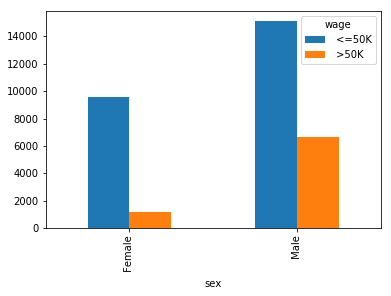

In [19]:
pd.crosstab(train['sex'],train['wage']).plot(kind='bar')

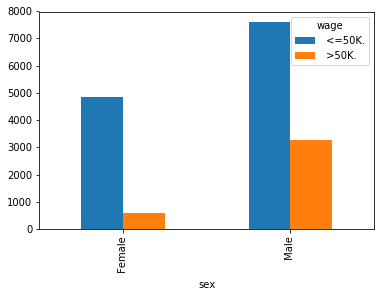

In [25]:
pd.crosstab(test['sex'],test['wage']).plot(kind='bar')

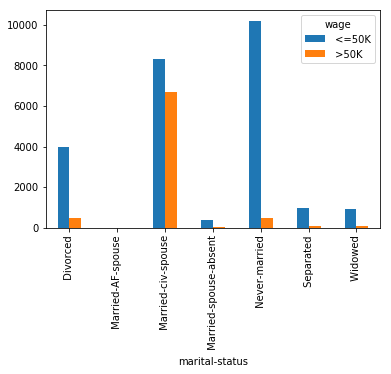

In [20]:
pd.crosstab(train['marital-status'],train['wage']).plot(kind='bar')

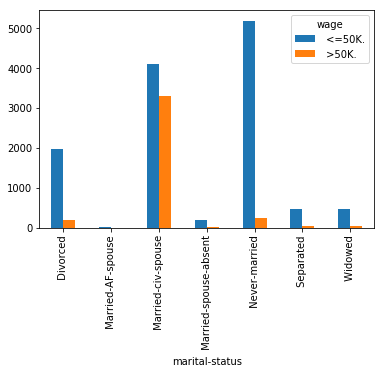

In [26]:
pd.crosstab(test['marital-status'],test['wage']).plot(kind='bar')

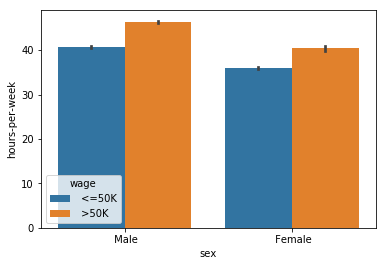

In [24]:
import seaborn as sns
#Bar plot for males and females with wage_class less than 50K tend to work more per week.   
sns.barplot(train['sex'], train['hours-per-week'], hue=train['wage'])

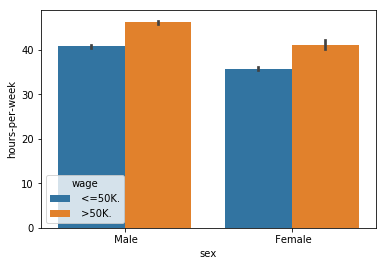

In [27]:
sns.barplot(test['sex'], test['hours-per-week'], hue=test['wage'])

In [28]:
print(train['wage'].value_counts())
print(test['wage'].value_counts())

 <=50K    24719
 >50K      7841
Name: wage, dtype: int64
 <=50K.    12435
 >50K.      3846
Name: wage, dtype: int64


## Convert >50K to 1 and <=50k to 0 

In [30]:
train['wage'] = train['wage'].map({' >50K': 1, ' <=50K': 0})
test['wage'] = test['wage'].map({' >50K.': 1, ' <=50K.': 0})

In [31]:
print(train['wage'].value_counts())
print(test['wage'].value_counts())

0    24719
1     7841
Name: wage, dtype: int64
0    12435
1     3846
Name: wage, dtype: int64


### Converting object datatypes to categorical 

In [32]:
for feature in train.columns:
    if train[feature].dtype == 'object':
        train[feature] = pd.Categorical(train[feature]).codes

## All features in Train are converted into either Integer or Categorical

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null int64
workclass         32560 non-null int8
fnlwgt            32560 non-null int64
education         32560 non-null int8
education-num     32560 non-null int64
marital-status    32560 non-null int8
occupation        32560 non-null int8
relationship      32560 non-null int8
race              32560 non-null int8
sex               32560 non-null int8
capital-gain      32560 non-null int64
capital-loss      32560 non-null int64
hours-per-week    32560 non-null int64
native-country    32560 non-null int8
wage              32560 non-null int64
dtypes: int64(7), int8(8)
memory usage: 2.0 MB


In [34]:
for feature in test.columns:
    if test[feature].dtype == 'object':
        test[feature] = pd.Categorical(test[feature]).codes

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null int8
fnlwgt            16281 non-null int64
education         16281 non-null int8
education-num     16281 non-null int64
marital-status    16281 non-null int8
occupation        16281 non-null int8
relationship      16281 non-null int8
race              16281 non-null int8
sex               16281 non-null int8
capital-gain      16281 non-null int64
capital-loss      16281 non-null int64
hours-per-week    16281 non-null int64
native-country    16281 non-null int8
wage              16281 non-null int64
dtypes: int64(7), int8(8)
memory usage: 1017.6 KB


## Problem 1:
## Prediction task is to determine whether a person makes over 50K a year.

In [36]:
#Split dataframe into feature and target
train_X = train.drop(['wage'], 1)
train_y = train['wage']
test_X = test.drop(['wage'], 1)
test_y = test['wage']

In [40]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 1.0,
    'silent': 1,
    'n_estimators': 5
}

In [41]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier(**params).fit(train_X, train_y)

In [42]:
xgb.predict(test_X)
print(xgb.score(test_X,test_y))


0.849947791905


## Problem 2:
## Which factors are important

In [43]:
xgb.feature_importances_

array([ 0.1911802 ,  0.        ,  0.        ,  0.        ,  0.11051605,
        0.        ,  0.        ,  0.33699819,  0.        ,  0.        ,
        0.24754538,  0.06227331,  0.05148694,  0.        ], dtype=float32)

<Container object of 14 artists>

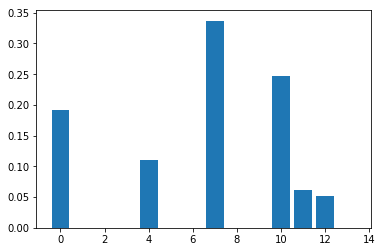

In [55]:
#Visualize feature importance 
plt.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)

In [56]:
train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'wage'],
      dtype='object')

## Problem 3:
## Which algorithms are best for this dataset

In [58]:
#Apply logistic regression model on the dataset
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_X,train_y)
pred_lr = lr.predict(test_X)
lr.score(test_X,test_y)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.79522142374547022

In [59]:
from sklearn.metrics import confusion_matrix, classification_report
#Confusion Matrix
confusion_matrix(test_y,pred_lr)

array([[11837,   598],
       [ 2736,  1110]], dtype=int64)

In [61]:
print(classification_report(test_y,pred_lr))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88     12435
           1       0.65      0.29      0.40      3846

   micro avg       0.80      0.80      0.80     16281
   macro avg       0.73      0.62      0.64     16281
weighted avg       0.77      0.80      0.76     16281



In [63]:
#Apply decision tree classifier model on the dataset
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=100, min_samples_leaf=2)
dtc.fit(train_X,train_y)
pred_dtc = dtc.predict(test_X)
dtc.score(test_X,test_y)

0.82120262883115291

In [64]:
confusion_matrix(test_y,pred_dtc)

array([[11204,  1231],
       [ 1680,  2166]], dtype=int64)

In [65]:
print(classification_report(test_y,pred_dtc))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     12435
           1       0.64      0.56      0.60      3846

   micro avg       0.82      0.82      0.82     16281
   macro avg       0.75      0.73      0.74     16281
weighted avg       0.81      0.82      0.82     16281



In [67]:
# Apply Bagging Classifier on the dataset
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(random_state=100)
bc.fit(train_X,train_y)
pred_bc = bc.predict(test_X)
bc.score(test_X,test_y)

0.84460413979485294

In [68]:
confusion_matrix(test_y,pred_bc)

array([[11607,   828],
       [ 1702,  2144]], dtype=int64)

In [69]:
print(classification_report(test_y,pred_bc))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.72      0.56      0.63      3846

   micro avg       0.84      0.84      0.84     16281
   macro avg       0.80      0.75      0.77     16281
weighted avg       0.84      0.84      0.84     16281



In [73]:
#Apply Random forest classifier on the dataset
rfc = RandomForestClassifier(random_state=100,criterion='entropy',min_samples_leaf=2)
rfc.fit(train_X,train_y)
pred_rfc = rfc.predict(test_X)
rfc.score(test_X,test_y)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.85504575886002088

In [75]:
confusion_matrix(test_y,pred_rfc)

array([[11617,   818],
       [ 1542,  2304]], dtype=int64)

In [76]:
print(classification_report(test_y,pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     12435
           1       0.74      0.60      0.66      3846

   micro avg       0.86      0.86      0.86     16281
   macro avg       0.81      0.77      0.78     16281
weighted avg       0.85      0.86      0.85     16281



In [77]:
#Apply XGBoost classifier on the dataset
xg = XGBClassifier(**params)
xg.fit(train_X, train_y)
pred_xg = xg.predict(test_X)
xg.score(test_X,test_y)

0.84994779190467418

In [78]:
confusion_matrix(test_y,pred_xg)

array([[11544,   891],
       [ 1552,  2294]], dtype=int64)

In [79]:
print(classification_report(test_y,pred_xg))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     12435
           1       0.72      0.60      0.65      3846

   micro avg       0.85      0.85      0.85     16281
   macro avg       0.80      0.76      0.78     16281
weighted avg       0.84      0.85      0.84     16281



Out of all the models above, we see that Random Forest gets 85.5% accuracy and is better model